---
##5.&nbsp; Challenge: apply this to the spotify dataset 😃
Use PCA to reduce noise and the dimensionality of the Spotify dataset before clustering the songs. This will help to identify the most important features of the songs, and it will also make the clustering process more efficient.

Once you have clustered the songs using the selected principal components, you can analyse the clusters to identify groups of similar songs. For example, you could look for clusters of songs with similar genres, tempos, or moods.

# Principal Component Analysis (PCA)


PCA can be used to improve the performance of clustering algorithms, as well as to reduce the computational complexity.

# import Librarys

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

from sklearn import set_config
set_config(transform_output="pandas")

# import Data

In [2]:
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter 6 Unsupervised ML/data/6.3.3_spotify_5000_songs.csv'
songs_df = pd.read_csv(url)
songs_df.tail()

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...
5234,5234,"Ravel: Boléro, M. 81 ...",Maurice Ravel,0.3540,0.04870,5,-24.568,1,0.0323,0.783,0.484,0.2840,0.2530,64.120,,948787,3,7E1ErYYCn0lYjHODZ1qGuB,https://open.spotify.com/track/7E1ErYYCn0lYjHO...


# Clean Data

In [3]:
songs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [4]:
songs_df.columns = songs_df.columns.str.replace(' ', '')


In [5]:
songs_df_cl = songs_df.drop(columns=['Unnamed:0', 'type', 'id', 'html'])
songs_df_cl

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


# set index

In [6]:
#we want to set song name and artist as our index
songs_df_cl = songs_df_cl.set_index(['artist', 'name'])
songs_df_cl

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Antônio Carlos Jobim,Saudade De Bahia,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
Martinho Da Vila,"Canta Canta, Minha Gente",0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Chico César,Mulher Eu Sei,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Kurt Elling,Rosa Morena,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


# Scale the Data

In [7]:
scaler = MinMaxScaler().set_output(transform='pandas')
songs_df_cl_mm = scaler.fit_transform(songs_df_cl)
songs_df_cl_mm

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Chico César,Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Kurt Elling,Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


# Baseline Model

>We will start by creating a basic k-means model. Later, we will apply PCA and compare the clusters to this baseline model to see if there is any difference.

In [8]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 25, # you always choose the number of k here
                   n_init="auto",
                   random_state = 42)

# Fit the model to the data
my_kmeans.fit(songs_df_cl_mm)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to a new DataFrame
clusters_df = pd.DataFrame(index=songs_df_cl.index,
                           data={"Base model": clusters})

clusters_df

,,Base model
artist,name,
Gilberto Gil,Se Eu Quiser Falar Com Deus,2
Antônio Carlos Jobim,Saudade De Bahia,17
Martinho Da Vila,"Canta Canta, Minha Gente",16
Chico César,Mulher Eu Sei,7
Kurt Elling,Rosa Morena,24
...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",23
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",23


>As we saw on the LMS, PCA creates as many principal components as the original DataFrame has columns. We then need to decide how many of these components to keep. Before we do that, let's look at how PCA transforms our DataFrame.

In [9]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(songs_df_cl_mm)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(songs_df_cl_mm)

pca_basic_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12
artist,name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,-0.094419,0.757884,-0.504083,0.438636,-0.257086,0.554242,0.560851,0.197453,0.102738,-0.022729,-0.013079,-0.005804,-0.006255
Antônio Carlos Jobim,Saudade De Bahia,-0.017481,-0.453019,-0.384560,-0.225555,0.082847,-0.174383,0.038690,0.109702,0.174917,-0.011962,-0.017243,0.015519,-0.011982
Martinho Da Vila,"Canta Canta, Minha Gente",-0.126719,-0.504107,-0.471724,-0.230476,0.276667,-0.007994,0.037417,-0.139534,-0.165436,0.016899,0.289205,0.069875,-0.010251
Chico César,Mulher Eu Sei,0.505367,-0.184282,-0.811681,-0.006984,-0.074671,0.106656,0.223721,0.101924,0.086820,-0.029381,0.008400,0.013775,-0.021077
Kurt Elling,Rosa Morena,0.542908,-0.131782,-0.744387,0.172948,-0.151485,-0.082936,0.009560,0.093759,-0.027305,-0.032008,-0.005094,0.063066,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.177483,0.113871,-0.123871,-0.106151,-0.116104,-0.081500,0.002337,-0.068789,0.079293,-0.077375,0.018366,0.012382,0.173650
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.974406,0.069205,-0.211216,0.173331,-0.305723,-0.099305,-0.023697,-0.105861,0.101755,-0.077026,0.011342,0.012386,0.137500
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.400419,0.327087,0.021031,0.424738,0.000413,-0.089724,-0.013262,-0.144308,0.239323,0.108310,0.059216,0.248719,-0.038534


>  we have the same amount of columns as before but we have lost the column names. This is because the columns are now principal components and not the original features (danceability, speechiness, etc...). Principal components are an abstraction of the original features, capturing the most significant patterns and trends within the data. They are like new axes along which the data is spread out, representing directions of maximum variance. The first principal component explains the largest amount of variance, followed by the second, and so on.

>>> Identifying the most informative principal components
Principal component analysis (PCA) assumes that variance is information. This means that PCA believes that the directions in which the data varies the most are the most important.

>>When we fit PCA to our data, it calculates all of the principal components. We can see how much variance each principal component explains using the `explained_variance_ratio_` attribute.
>> The principal components are ranked in order of decreasing variance, with the first principal component explaining the most variance in the data

In [10]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.27948434, 0.26165474, 0.18337196, 0.11435786, 0.06083028,
       0.0276579 , 0.0226709 , 0.01778696, 0.01492237, 0.0073763 ,
       0.00603544, 0.00251644, 0.00133449])

To determine how many principal components to keep, we can use one of two methods:

- **Elbow method**: This is a more manual approach where we plot the explained variance of each principal component against its index. The elbow point is the point at which the explained variance starts to drop off significantly. This is the point at which it is no longer worth retaining any more principal components, as they are not explaining much additional variance.
- **Cumulative explained variance**: This is a more automated approach where SKLearn calculates how many principal components contain a given amount of variance, such as 95%.

# The elbow method works by plotting the variance of each principal component against its index.

/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


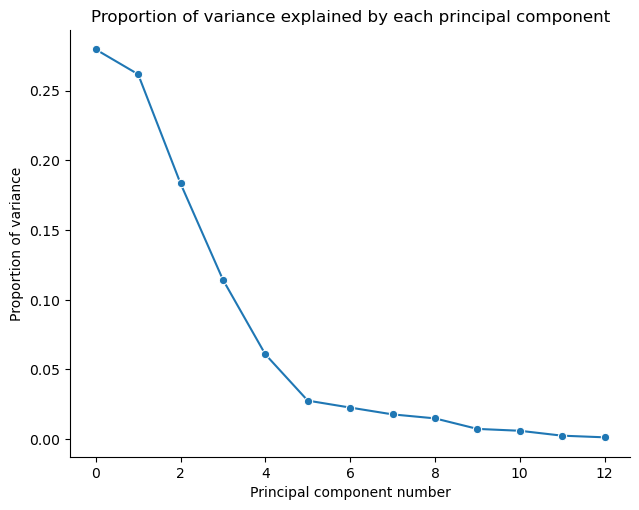

In [11]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

# Add a column for the principal component index
explained_variance_array_df["Principal component index"] = range(len(explained_variance_array))

(
# Create a line chart with sns.relplot
sns.relplot(
    kind='line',
    data=explained_variance_array_df,
    x="Principal component index",
    y="Variance explained",
    marker='o',
    aspect=1.3)
# Set the title of the plot
.set(title="Proportion of variance explained by each principal component")
# Set the axis labels
.set_axis_labels("Principal component number", "Proportion of variance")
);

>Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [20]:
# Set the variable elbow to where you believe the elbow is
elbow = 6

>Let's make a DataFrame containing these principle components

In [21]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(songs_df_cl_mm)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
artist,name,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,-0.094419,0.757884,-0.504083,0.438636,-0.257086,0.554242,0.560851
Antônio Carlos Jobim,Saudade De Bahia,-0.017481,-0.453019,-0.384560,-0.225555,0.082847,-0.174383,0.038690
Martinho Da Vila,"Canta Canta, Minha Gente",-0.126719,-0.504107,-0.471724,-0.230476,0.276667,-0.007994,0.037417
Chico César,Mulher Eu Sei,0.505367,-0.184282,-0.811681,-0.006984,-0.074671,0.106656,0.223721
Kurt Elling,Rosa Morena,0.542908,-0.131782,-0.744387,0.172948,-0.151485,-0.082936,0.009560
...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.177483,0.113871,-0.123871,-0.106151,-0.116104,-0.081500,0.002337
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.974406,0.069205,-0.211216,0.173331,-0.305723,-0.099305,-0.023697
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.400419,0.327087,0.021031,0.424738,0.000413,-0.089724,-0.013262


Let's compare the clusters made when using PCA to when not using PCA.
> It's helpful to demonstrate this on a small dataset so you can easily grasp the concept of PCA before scaling up. However, it's unlikely we'll see a dramatic difference, if any, on such a small dataset. This is normal, and you shouldn't worry about it. As long as you understand the principle of what's happening, this will help you throughout the bootcamp as you learn about machine learning on larger datasets.

In [23]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 25, # you always choose the number of k here
                   n_init="auto",
                   random_state = 42)

# Fit the model to the data
my_kmeans.fit(pca_elbow_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df[f"PCA - {elbow}"] = clusters

clusters_df

,,Base model,PCA - 9,PCA - 0.95,PCA - 6
artist,name,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,2,21,17,17
Antônio Carlos Jobim,Saudade De Bahia,17,11,21,21
Martinho Da Vila,"Canta Canta, Minha Gente",16,11,4,4
Chico César,Mulher Eu Sei,7,12,8,8
Kurt Elling,Rosa Morena,24,7,8,8
...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0,0,0,0
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",23,10,22,22
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",23,10,22,22


>Cumulative explained variance
Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


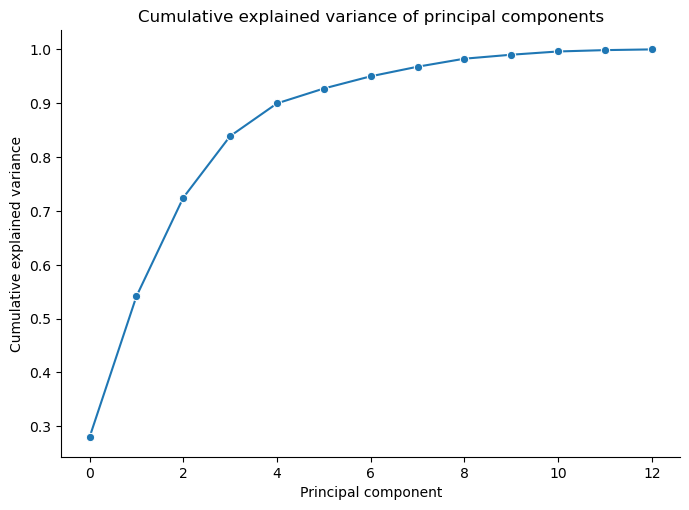

In [24]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

In [16]:
# Create a PCA object
pca_variance = PCA(n_components=0.95)

>Let's visualise this threshold

/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


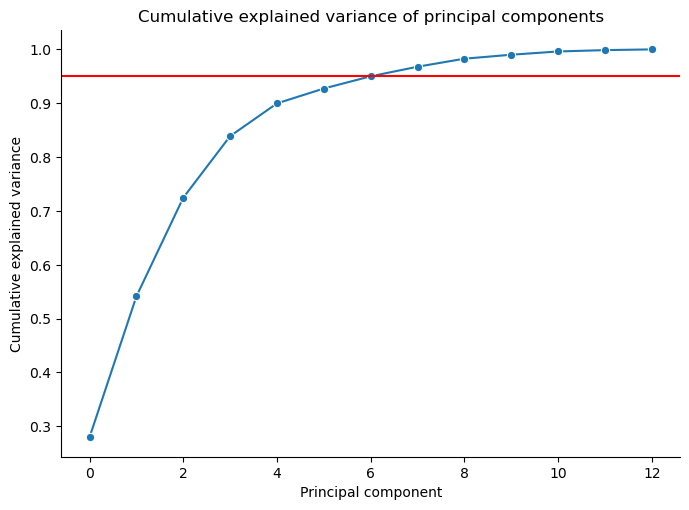

In [17]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y=0.95,
            color='red');

>Let's apply this to our scaled data

In [25]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(songs_df_cl_mm)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
artist,name,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,-0.094419,0.757884,-0.504083,0.438636,-0.257086,0.554242,0.560851
Antônio Carlos Jobim,Saudade De Bahia,-0.017481,-0.453019,-0.384560,-0.225555,0.082847,-0.174383,0.038690
Martinho Da Vila,"Canta Canta, Minha Gente",-0.126719,-0.504107,-0.471724,-0.230476,0.276667,-0.007994,0.037417
Chico César,Mulher Eu Sei,0.505367,-0.184282,-0.811681,-0.006984,-0.074671,0.106656,0.223721
Kurt Elling,Rosa Morena,0.542908,-0.131782,-0.744387,0.172948,-0.151485,-0.082936,0.009560
...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.177483,0.113871,-0.123871,-0.106151,-0.116104,-0.081500,0.002337
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.974406,0.069205,-0.211216,0.173331,-0.305723,-0.099305,-0.023697
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.400419,0.327087,0.021031,0.424738,0.000413,-0.089724,-0.013262


Great! Now we can view the clusters created by this model alongside our baseline and elbow clusters.

In [26]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 25, # you always choose the number of k here
                   n_init="auto",
                   random_state = 42)

# Fit the model to the data
my_kmeans.fit(pca_variance_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df["PCA - 0.95"] = clusters

clusters_df

,,Base model,PCA - 9,PCA - 0.95,PCA - 6
artist,name,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,2,21,17,17
Antônio Carlos Jobim,Saudade De Bahia,17,11,21,21
Martinho Da Vila,"Canta Canta, Minha Gente",16,11,4,4
Chico César,Mulher Eu Sei,7,12,8,8
Kurt Elling,Rosa Morena,24,7,8,8
...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0,0,0,0
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",23,10,22,22
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",23,10,22,22


>Using PCA on a bigger dataset
Let's look at how useful PCA can be as your datasets get bigger

Sklearn `make_blobs` creates artificial datasets with distinct clusters. Specifically, it creates a specified number of clusters, each with a defined center and standard deviation, and generates a set of random data points around these cluster centers.